In [107]:
import os, sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [108]:
read_data = pd.read_csv('2019_4_2_02379003-6369-43bf-b444-842420685d06.csv')

In [109]:
read_data.columns

Index(['clientId', 'clientIncome', 'incomeVerified', 'clientAge',
       'clientGender', 'clientMaritalStatus', 'clientLoanPurpose',
       'clientResidentialStauts', 'clientState', 'clientTimeAtEmployer',
       'clientNumberPhoneContacts', 'clientAvgCallsPerDay', 'loanType',
       'loanNumber', 'applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt', 'loanAmount',
       'interestRate', 'loanTerm', 'max_amount_taken', 'max_tenor_taken',
       'paymentRatio', 'FirstPaymentDefault', 'loanDefault'],
      dtype='object')

In [110]:
read_data['incomeVerified'][read_data['incomeVerified'] == 'true'] = 1
read_data['incomeVerified'][read_data['incomeVerified'] == 'false'] = 0

In [111]:
read_data = read_data.drop('loanType', axis = 1)

In [112]:
read_data['clientResidentialStauts'][read_data['clientResidentialStauts']== 'Null'] = 'Rented'

In [113]:
read_data['clientState'][read_data['clientState'] == 'Null'] = 'LAGOS'
read_data['clientState'].value_counts()

LAGOS          60667
OGUN           14798
ABUJA          13999
OYO            12731
RIVERS          7829
DELTA           5081
KWARA           3969
OSUN            3816
ONDO            3571
KADUNA          3496
EDO             2663
NIGER           2462
BENUE           2043
EKITI           2023
AKWA IBOM       1960
KOGI            1896
PLATEAU         1715
CROSS RIVER     1608
NASARAWA        1589
ENUGU           1566
ANAMBRA         1496
ABIA            1426
IMO             1287
KANO            1233
BAYELSA         1179
ADAMAWA          569
BAUCHI           418
SOKOTO           398
EBONYI           392
TARABA           336
KEBBI            279
GOMBE            265
KATSINA          248
ZAMFARA          221
BORNO            210
YOBE              83
JIGAWA            72
LAGOS              1
OJO                1
Name: clientState, dtype: int64

In [114]:
read_data['clientMaritalStatus'].value_counts()

Married      85492
Single       71361
Separated     1795
Widowed        939
Null             6
Divorced         3
Name: clientMaritalStatus, dtype: int64

In [115]:
read_data['clientMaritalStatus'][read_data['clientMaritalStatus']== 'Null'] = 'Married'

In [116]:
read_data['clientLoanPurpose'].value_counts()

business     78976
other        31554
house        22240
education    15737
medical      11089
Name: clientLoanPurpose, dtype: int64

In [117]:
read_data['clientResidentialStauts'].value_counts()

Rented               101670
Own Residence         26406
Family Owned          25668
Employer Provided      5589
Temp. Residence         263
Name: clientResidentialStauts, dtype: int64

In [118]:
data = pd.get_dummies(read_data,prefix_sep = '_', columns = ['clientGender', 'clientState', 'clientMaritalStatus',
                                         'clientLoanPurpose', 'clientResidentialStauts'])

In [119]:
data.head(3)

,clientId,clientIncome,incomeVerified,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,applicationDate,approvalDate,...,clientLoanPurpose_business,clientLoanPurpose_education,clientLoanPurpose_house,clientLoanPurpose_medical,clientLoanPurpose_other,clientResidentialStauts_Employer Provided,clientResidentialStauts_Family Owned,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence
0,719046128,25000.00,1,38,36+,2976,51.40909090909091,4,2018-03-18,2018-03-18,...,1,0,0,0,0,0,0,0,1,0
1,821565030,105000.00,0,31,36+,1159,121.03645833333333,4,2018-01-06,2018-01-06,...,0,0,1,0,0,0,0,0,1,0
2,703822576,78029.19,1,38,36+,1375,13.402912621359222,4,2018-04-27,2018-04-27,...,0,1,0,0,0,0,1,0,0,0


In [120]:
data = data.drop(['applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt'], axis = 1)

In [121]:
x.columns

Index(['clientIncome', 'incomeVerified', 'clientAge', 'loanNumber',
       'loanAmount', 'interestRate', 'loanTerm', 'max_amount_taken',
       'max_tenor_taken', 'paymentRatio', 'FirstPaymentDefault', 'loanDefault',
       'clientGender_FEMALE', 'clientGender_MALE', 'clientState_ABIA',
       'clientState_ABUJA', 'clientState_ADAMAWA', 'clientState_AKWA IBOM',
       'clientState_ANAMBRA', 'clientState_BAUCHI', 'clientState_BAYELSA',
       'clientState_BENUE', 'clientState_BORNO', 'clientState_CROSS RIVER',
       'clientState_DELTA', 'clientState_EBONYI', 'clientState_EDO',
       'clientState_EKITI', 'clientState_ENUGU', 'clientState_GOMBE',
       'clientState_IMO', 'clientState_JIGAWA', 'clientState_KADUNA',
       'clientState_KANO', 'clientState_KATSINA', 'clientState_KEBBI',
       'clientState_KOGI', 'clientState_KWARA', 'clientState_LAGOS',
       'clientState_LAGOS ', 'clientState_NASARAWA', 'clientState_NIGER',
       'clientState_OGUN', 'clientState_OJO', 'clientState_OND

In [122]:
x = data.drop(['clientId', 'clientNumberPhoneContacts'], axis = 1)

In [123]:
for k in x.columns:
    value = sum([isinstance(i, str) for i in x[k]])
    if value > 1:
        print(k, value)
    else:
        pass

incomeVerified 103
clientTimeAtEmployer 159596
clientAvgCallsPerDay 159596


In [124]:
x['incomeVerified'].value_counts()

0       133286
1        26207
Null       103
Name: incomeVerified, dtype: int64

In [125]:
x['incomeVerified'][x['incomeVerified']== 'Null'] = 0

In [126]:
x['clientTimeAtEmployer'][x['clientTimeAtEmployer']== 'Null'] = 36

In [127]:
x = x.drop(['clientTimeAtEmployer', 'clientAvgCallsPerDay'], axis = 1)

In [81]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components = 2)
pmodel = pca.fit_transform(x)

In [91]:
pca.explained_variance_ratio_.sum()

0.99999991351147799

In [92]:
principalDf = pd.DataFrame(data = pmodel, columns = ['principal component 1', 'principal component 2'])

In [93]:
# display principal components
principalDf.head()

,principal component 1,principal component 2
0,-64458.453741,18454.488372
1,13766.816134,-5062.749725
2,-4422.734353,94940.114792
3,-57197.704160,-12811.086747
4,266745.894982,73852.253484


In [94]:
principalDf['target'] = target

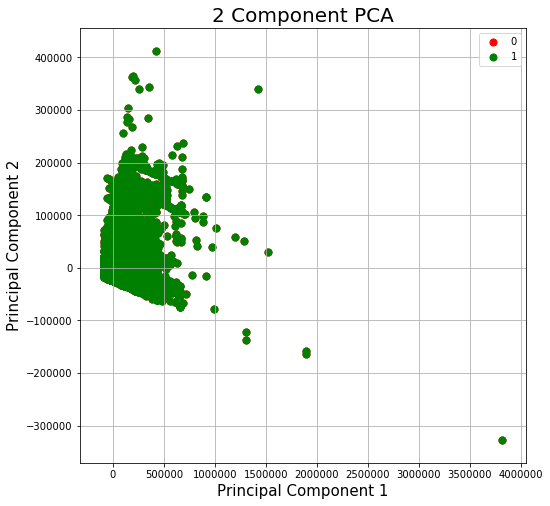

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [128]:
min_max = MinMaxScaler()
std = StandardScaler()
norm = Normalizer()

x_new = min_max.fit_transform(x)
x_std = std.fit_transform(x_new)
x_norm = std.fit_transform(x_std)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, target, test_size = 0.4, random_state = 42)

In [71]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [72]:
log.fit(x_train, y_train)
log.score(x_train, y_train)

1.0

In [73]:
prediction = log.predict(x_test)

In [74]:
prediction.shape

(63839,)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(prediction, y_test)

1.0

In [77]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[45958     0]
 [    0 17881]]


In [78]:
from sklearn.metrics import f1_score

In [79]:
f1_score(y_test, prediction)

1.0

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     45958
          1       1.00      1.00      1.00     17881

avg / total       1.00      1.00      1.00     63839



In [103]:
import seaborn as sns

In [104]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This function tries to infer a good colormap to use from the data, but
    this is not guaranteed to work, so take care to make sure the kind of
    colormap (sequential or diverging) and its limits are appropriate.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into a

In [130]:
x.head(2)

,clientIncome,incomeVerified,clientAge,loanNumber,loanAmount,interestRate,loanTerm,max_amount_taken,max_tenor_taken,paymentRatio,...,clientLoanPurpose_business,clientLoanPurpose_education,clientLoanPurpose_house,clientLoanPurpose_medical,clientLoanPurpose_other,clientResidentialStauts_Employer Provided,clientResidentialStauts_Family Owned,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence
0,25000.0,1,38,4,48000,7.5,180,1,1,0.0,...,1,0,0,0,0,0,0,0,1,0
1,105000.0,0,31,4,31500,12.5,90,1,1,0.0,...,0,0,1,0,0,0,0,0,1,0


In [133]:
x['target'] = target

In [134]:
x.columns

Index(['clientIncome', 'incomeVerified', 'clientAge', 'loanNumber',
       'loanAmount', 'interestRate', 'loanTerm', 'max_amount_taken',
       'max_tenor_taken', 'paymentRatio', 'FirstPaymentDefault', 'loanDefault',
       'clientGender_FEMALE', 'clientGender_MALE', 'clientState_ABIA',
       'clientState_ABUJA', 'clientState_ADAMAWA', 'clientState_AKWA IBOM',
       'clientState_ANAMBRA', 'clientState_BAUCHI', 'clientState_BAYELSA',
       'clientState_BENUE', 'clientState_BORNO', 'clientState_CROSS RIVER',
       'clientState_DELTA', 'clientState_EBONYI', 'clientState_EDO',
       'clientState_EKITI', 'clientState_ENUGU', 'clientState_GOMBE',
       'clientState_IMO', 'clientState_JIGAWA', 'clientState_KADUNA',
       'clientState_KANO', 'clientState_KATSINA', 'clientState_KEBBI',
       'clientState_KOGI', 'clientState_KWARA', 'clientState_LAGOS',
       'clientState_LAGOS ', 'clientState_NASARAWA', 'clientState_NIGER',
       'clientState_OGUN', 'clientState_OJO', 'clientState_OND

In [135]:
sns.heatmap(x, cmap = 'viridis')
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''